# Notebook para evaluación del SRI de Semántica Latente

## Configuración inicial

In [1]:
# Cranfield load
from engine.cranfield import CranfieldGetter as Getter
from engine.cranfield import dataset

In [2]:
# Model load
from engine.lsi import LatentSemanticIRS as IRS

In [3]:
# Get id of all documents
all_docs=[d.doc_id for d in dataset.docs_iter()]

In [4]:
# Setup system
IRS = IRS()
IRS.data_getter=Getter()

In [5]:
# Index the documents
IRS.add_documents(all_docs)

In [6]:
# Import Qrels and metrics
import engine.metrics as m
from engine.cranfield import CranfieldQrelsGetter as QrelGetter

# Maximum relevance definition
class MaxRelMetric(m.IRSMetric):
    def calculate(self, irs, qrel) -> float:
        return max((r for _,r in irs.pre_query(qrel.query)))

METRICS = {
    'Time': m.TimeMetric(), # In seconds
    'Prec':m.PrecisionMetric(),
    'Rec':m.RecoveryMetric(),
    'F1':m.F1Metric(),
    'Max': MaxRelMetric()
}

In [7]:
# Qrels load
QRELS=QrelGetter().getqrels()

In [8]:
from typing import Iterable

# Result of each metric in the model
RESULTS={}

## Cálculo

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
def print_results(metric):
    results = RESULTS[metric]

    ser = pd.Series(pd.cut(results, 15))
    grouped=ser.groupby(ser).count()

    df=pd.DataFrame(grouped.values,grouped.index)
    df.index.name='Intervalo'
    df.columns=['Frecuencia Absoluta']

    total=df['Frecuencia Absoluta'].sum()

    df['Frecuencia Relativa']=df['Frecuencia Absoluta']/total
    df['Porcentaje']=df['Frecuencia Relativa']*100
    df['Marca de Clase']=df.index.map(lambda x:x.mid)

    print(f'Promedio: {np.mean(results):.5f}')
    print(f'Máximo: {np.max(results):.5f}')
    print(f'Mínimo: {np.min(results):.5f}')
    print(f"Moda: {[float(x) for x in (df.loc[df['Frecuencia Absoluta'] == df.max()['Frecuencia Absoluta']]['Marca de Clase']).values]}")
    print(f"Mediana: {np.median(results):.5f}")
    print(f"Desviación estándar: {np.std(results):.5f}")
    
    print("\nCuartiles:")
    print(f"\tQ1:{np.quantile(results,.25)}")
    print(f"\tQ3:{np.quantile(results,.75)}")

    return df


def plot(metric):
    # Plotting
    plt.style.use('ggplot')
    plt.figure(figsize=(9, 5))
    plt.hist(RESULTS[metric], bins=15)

    return plt.show()


### Tiempo de procesado de la consulta en segundos

In [11]:
metric='Time'

RESULTS[metric] =np.fromiter((
    METRICS[metric].calculate_all(IRS, QRELS)),dtype=float)


In [12]:
print_results(metric)

Promedio: 0.26489
Máximo: 0.40900
Mínimo: 0.23200
Moda: [0.2615]
Mediana: 0.25790
Desviación estándar: 0.03093

Cuartiles:
	Q1:0.249
	Q3:0.266


,Frecuencia Absoluta,Frecuencia Relativa,Porcentaje,Marca de Clase
Intervalo,,,,
"(0.232, 0.244]",29,0.128889,12.888889,0.2380
"(0.244, 0.256]",69,0.306667,30.666667,0.2500
"(0.256, 0.267]",78,0.346667,34.666667,0.2615
"(0.267, 0.279]",23,0.102222,10.222222,0.2730
"(0.279, 0.291]",4,0.017778,1.777778,0.2850
"(0.291, 0.303]",1,0.004444,0.444444,0.2970
"(0.303, 0.315]",2,0.008889,0.888889,0.3090
"(0.315, 0.326]",4,0.017778,1.777778,0.3205
"(0.326, 0.338]",3,0.013333,1.333333,0.3320


#### Histograma de frecuencia

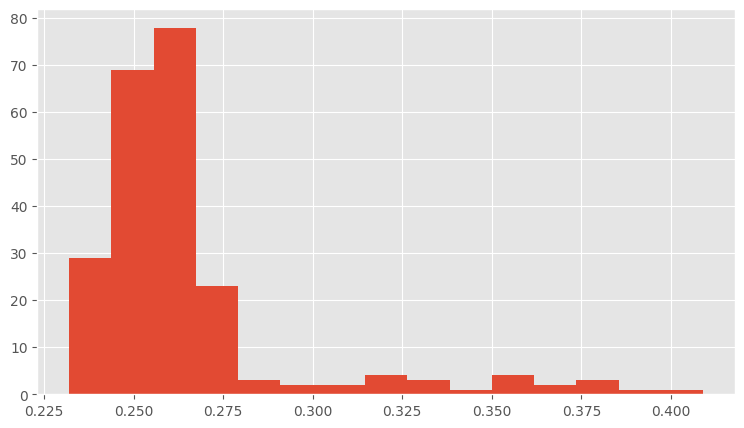

In [13]:
plot(metric)

### Precisión

In [14]:
metric='Prec'

RESULTS[metric] =np.fromiter((
    METRICS[metric].calculate_all(IRS, QRELS)),dtype=float)



In [15]:
print_results(metric)

Promedio: 0.26069
Máximo: 1.00000
Mínimo: 0.00000
Moda: [0.03285]
Mediana: 0.12500
Desviación estándar: 0.33303

Cuartiles:
	Q1:0.0
	Q3:0.42857142857142855


,Frecuencia Absoluta,Frecuencia Relativa,Porcentaje,Marca de Clase
Intervalo,,,,
"(-0.001, 0.0667]",106,0.471111,47.111111,0.03285
"(0.0667, 0.133]",10,0.044444,4.444444,0.09985
"(0.133, 0.2]",16,0.071111,7.111111,0.16650
"(0.2, 0.267]",15,0.066667,6.666667,0.23350
"(0.267, 0.333]",12,0.053333,5.333333,0.30000
"(0.333, 0.4]",9,0.040000,4.000000,0.36650
"(0.4, 0.467]",6,0.026667,2.666667,0.43350
"(0.467, 0.533]",13,0.057778,5.777778,0.50000
"(0.533, 0.6]",6,0.026667,2.666667,0.56650


#### Histograma de frecuencia

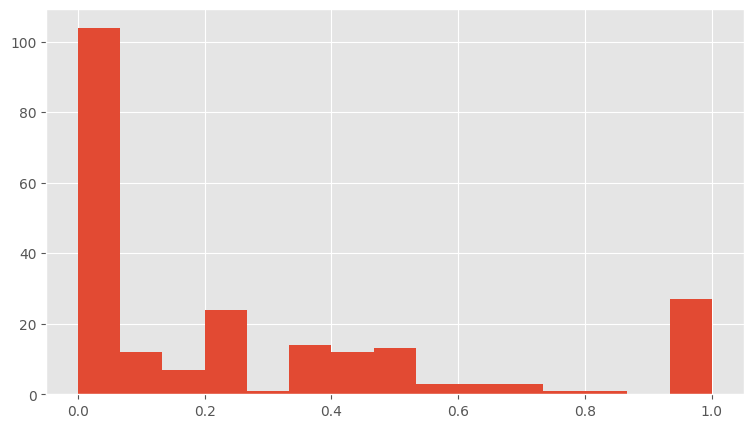

In [16]:
plot(metric)

### Recobrado

In [17]:
metric='Rec'

RESULTS[metric] =np.fromiter((
    METRICS[metric].calculate_all(IRS, QRELS)),dtype=float)


In [18]:
print_results(metric)

Promedio: 0.23060
Máximo: 1.00000
Mínimo: 0.00000
Moda: [0.03285]
Mediana: 0.06667
Desviación estándar: 0.32195

Cuartiles:
	Q1:0.0
	Q3:0.3333333333333333


,Frecuencia Absoluta,Frecuencia Relativa,Porcentaje,Marca de Clase
Intervalo,,,,
"(-0.001, 0.0667]",113,0.502222,50.222222,0.03285
"(0.0667, 0.133]",13,0.057778,5.777778,0.09985
"(0.133, 0.2]",19,0.084444,8.444444,0.16650
"(0.2, 0.267]",10,0.044444,4.444444,0.23350
"(0.267, 0.333]",15,0.066667,6.666667,0.30000
"(0.333, 0.4]",8,0.035556,3.555556,0.36650
"(0.4, 0.467]",3,0.013333,1.333333,0.43350
"(0.467, 0.533]",10,0.044444,4.444444,0.50000
"(0.533, 0.6]",4,0.017778,1.777778,0.56650


#### Histograma de frecuencia

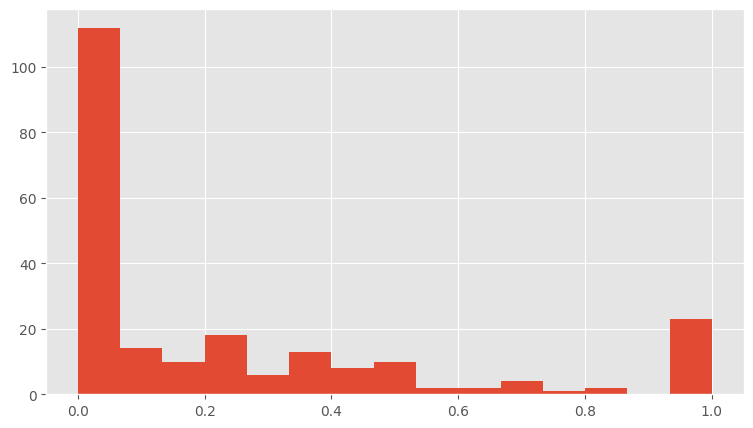

In [19]:
plot(metric)

### Formula F1

In [20]:
metric='F1'

RESULTS[metric] =np.fromiter((
    METRICS[metric].calculate_all(IRS, QRELS)),dtype=float)



In [21]:
print_results(metric)

Promedio: 0.15119
Máximo: 1.00000
Mínimo: 0.00000
Moda: [0.03285]
Mediana: 0.00000
Desviación estándar: 0.20227

Cuartiles:
	Q1:0.0
	Q3:0.2857142857142857


,Frecuencia Absoluta,Frecuencia Relativa,Porcentaje,Marca de Clase
Intervalo,,,,
"(-0.001, 0.0667]",120,0.533333,53.333333,0.03285
"(0.0667, 0.133]",12,0.053333,5.333333,0.09985
"(0.133, 0.2]",21,0.093333,9.333333,0.16650
"(0.2, 0.267]",12,0.053333,5.333333,0.23350
"(0.267, 0.333]",23,0.102222,10.222222,0.30000
"(0.333, 0.4]",9,0.040000,4.000000,0.36650
"(0.4, 0.467]",6,0.026667,2.666667,0.43350
"(0.467, 0.533]",11,0.048889,4.888889,0.50000
"(0.533, 0.6]",4,0.017778,1.777778,0.56650


#### Histograma de frecuencia

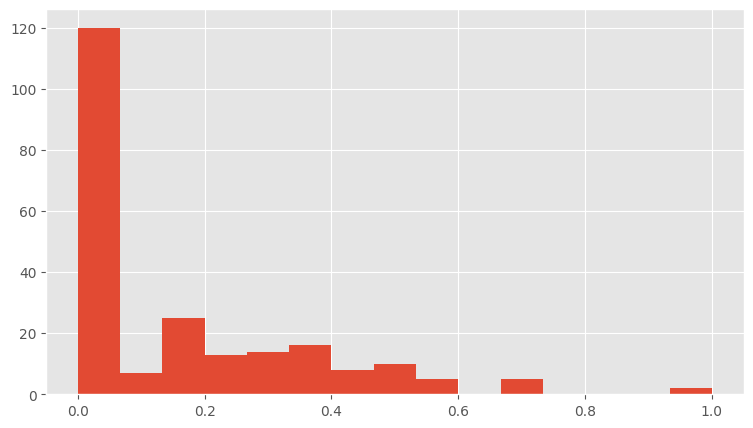

In [22]:
plot(metric)

### Relevancia máxima


In [23]:
metric='Max'

RESULTS[metric] =np.fromiter((
    METRICS[metric].calculate_all(IRS, QRELS)),dtype=float)



In [24]:
print_results(metric)

Promedio: 0.64214
Máximo: 0.90468
Mínimo: 0.35333
Moda: [0.5925]
Mediana: 0.63278
Desviación estándar: 0.11190

Cuartiles:
	Q1:0.5599669133292245
	Q3:0.714234188788327


,Frecuencia Absoluta,Frecuencia Relativa,Porcentaje,Marca de Clase
Intervalo,,,,
"(0.353, 0.39]",1,0.004444,0.444444,0.3715
"(0.39, 0.427]",2,0.008889,0.888889,0.4085
"(0.427, 0.464]",6,0.026667,2.666667,0.4455
"(0.464, 0.5]",9,0.040000,4.000000,0.4820
"(0.5, 0.537]",23,0.102222,10.222222,0.5185
"(0.537, 0.574]",27,0.120000,12.000000,0.5555
"(0.574, 0.611]",33,0.146667,14.666667,0.5925
"(0.611, 0.647]",27,0.120000,12.000000,0.6290
"(0.647, 0.684]",23,0.102222,10.222222,0.6655


#### Histograma de frecuencia

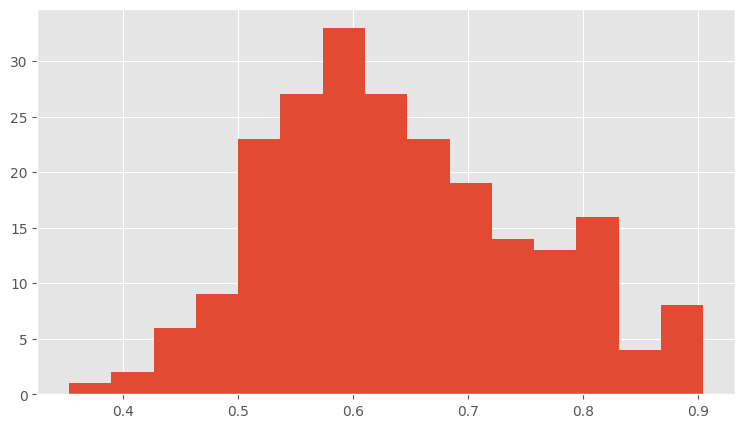

In [25]:
plot(metric)